In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
path = "./MICS6_2023_Stats-Day-Competition/MICS6_2019_Stats Day Competition/Datasets/hh_Household_Stat_Day.xlsx"
dataset = pd.read_excel(path)

In [11]:
# Household have bed (HC7C), mattress for sleeping (HC7F) by Region(HH7) then Area (HH6)
# bed and mattress
# bed but no matress
# matress bu no bed
# neither
selected_columns = ["HC7C", "HC7F", "HH7", "HH6"]
temp = dataset[selected_columns]
temp.rename(columns={
    "HC7C": "household_have_bed",
    "HC7F": "household_have_sleeping_mattress",
    "HH7": "region_number",
    "HH6": "urban_rural"
}, inplace=True)

temp["household_have_bed"].fillna(3, inplace=True)
temp["household_have_sleeping_mattress"].fillna(3, inplace=True)

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8285 entries, 0 to 8284
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   household_have_bed                8285 non-null   float64
 1   household_have_sleeping_mattress  8285 non-null   float64
 2   region_number                     8285 non-null   int64  
 3   urban_rural                       8285 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 259.0 KB


/tmp/ipykernel_24133/4124831251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.rename(columns={
/tmp/ipykernel_24133/4124831251.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["household_have_bed"].fillna(3, inplace=True)
/tmp/ipykernel_24133/4124831251.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["household_have_sleeping_mattress"].fillna(3, inplace=True)


### Remove rows where n/a is found in the both columns of household_have_bed and household_have_sleeping_mattress


In [12]:
df = temp[~((temp["household_have_bed"] ==
             3) & (temp["household_have_sleeping_mattress"] == 3))]

# should have 8285-1213=7072

In [13]:
df["bed_or_mattress"] = df.apply(
    lambda x: x["household_have_bed"] == 1 or x["household_have_sleeping_mattress"] == 1, axis=1)

/tmp/ipykernel_24133/2206790113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bed_or_mattress"] = df.apply(


In [14]:
# respondents_per_region
respondents_per_region = df[["region_number", "urban_rural"]].groupby(
    by="region_number").count().reset_index()

In [15]:
#    "HC7C": "household_have_bed",
#    "HC7F": "household_have_sleeping_mattress",
#    "HH7": "region_number",
#    "HH6": "urban_rural"

In [16]:
# respondents_per_area
def get_region_total(region_number):
    region_total = respondents_per_region[respondents_per_region["region_number"]
                                          == region_number]["urban_rural"].values[0]
    return region_total


#######################################################
# bed and mattress
temp_1 = df_0[(df_0["HC7C"] == 1) & (df_0["HC7F"] == 1)
              ].groupby(by=["HH7", "HH6"]).count().reset_index()
temp_1.drop(columns=["HC7F"], inplace=True)
temp_1.rename(columns={"HC7C": "has_bed_has_mattress"}, inplace=True)

# port = percent of region total
temp_1["port_has_bed_has_mattress"] = temp_1.apply(
    lambda x: x["has_bed_has_mattress"]/get_region_total(x["HH7"]), axis=1)

#######################################################
# bed but no matress
temp_2 = df_0[(df_0["HC7C"] == 1) & (df_0["HC7F"] == 2)
              ].groupby(by=["HH7", "HH6"]).count().reset_index()
temp_2.drop(columns=["HC7F"], inplace=True)
temp_2.rename(columns={"HC7C": "has_bed_no_mattress"}, inplace=True)

# port = percent of region total
temp_2["port_has_bed_no_mattress"] = temp_2.apply(
    lambda x: x["has_bed_no_mattress"]/get_region_total(x["HH7"]), axis=1)

#######################################################
# no bed but has mattress
temp_3 = df_0[(df_0["HC7C"] == 2) & (df_0["HC7F"] == 1)
              ].groupby(by=["HH7", "HH6"]).count().reset_index()
temp_3.drop(columns=["HC7F"], inplace=True)
temp_3.rename(columns={"HC7C": "no_bed_has_mattress"}, inplace=True)
temp_3

# port = percent of region total
temp_3["port_no_bed_has_mattress"] = temp_3.apply(
    lambda x: x["no_bed_has_mattress"]/get_region_total(x["HH7"]), axis=1)

#######################################################
# neither
temp_4 = df_0[(df_0["HC7C"] == 2) & (df_0["HC7F"] == 2)
              ].groupby(by=["HH7", "HH6"]).count().reset_index()
temp_4.drop(columns=["HC7F"], inplace=True)
temp_4.rename(columns={"HC7C": "no_bed_no_mattress"}, inplace=True)
temp_4

# port = percent of region total
temp_4["port_no_bed_no_mattress"] = temp_4.apply(
    lambda x: x["no_bed_no_mattress"]/get_region_total(x["HH7"]), axis=1)


df_1 = temp_1[["HH7", "HH6", "has_bed_has_mattress"]]
df_1["has_bed_no_mattress"] = temp_2[["has_bed_no_mattress"]]
df_1["no_bed_has_mattress"] = temp_3[["no_bed_has_mattress"]]
df_1["no_bed_no_mattress"] = temp_4[["no_bed_no_mattress"]]

df_1

NameError: name 'df_0' is not defined

In [17]:
# df_2 = df[["region_number", "urban_rural", "bed_or_mattress"]]
# df_2.groupby(by=["region_number", "urban_rural", "bed_or_mattress"]).count()
# df_2 = df["region_number" == 1]
# respondents_per_region_area = df[["region_number", "urban_rural", "bed_or_mattress"]].groupby(
#    by=["region_number", "urban_rural"]).aggregate('count')
respondents_per_region_area = df[["region_number", "urban_rural", "bed_or_mattress"]].groupby(
    by=["region_number", "urban_rural"]).count()
respondents_per_region_area.columns

Index(['bed_or_mattress'], dtype='object')

In [18]:
# have_bed_or_mattress = df[df["bed_or_mattress"] == True]
have_bed_or_mattress = df[df["bed_or_mattress"] == True][["region_number", "urban_rural", "bed_or_mattress"]].groupby(
    by=["region_number", "urban_rural"]).count()
have_bed_or_mattress.rename(
    columns={"bed_or_mattress": "have_bed_or_mattress"}, inplace=True)
neither_bed_or_mattress = df[df["bed_or_mattress"] == False][["region_number", "urban_rural", "bed_or_mattress"]].groupby(
    by=["region_number", "urban_rural"]).count()
neither_bed_or_mattress.rename(
    columns={"bed_or_mattress": "neither_bed_or_mattress"}, inplace=True)
# neither_bed_or_mattress = df[df["bed_or_mattress"] == False]

In [19]:
t = pd.merge(have_bed_or_mattress, neither_bed_or_mattress,
             how="outer", left_index=True, right_index=True).reset_index()

In [20]:
t

,region_number,urban_rural,have_bed_or_mattress,neither_bed_or_mattress
0,1,1,143,11.0
1,1,2,354,11.0
2,2,1,216,NaN
3,2,2,526,4.0
4,3,2,899,1.0
5,4,1,496,1.0
6,4,2,757,1.0
7,5,2,703,4.0
8,6,1,402,NaN
9,6,2,676,2.0


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


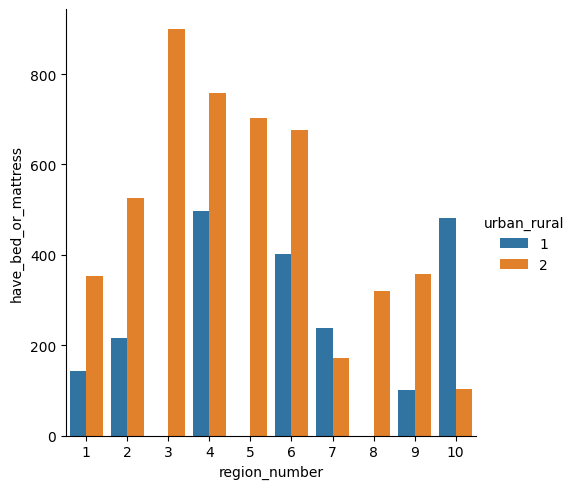

In [ ]:

sns.catplot(
    data=t,
    # height=20,
    x="region_number",
    y="have_bed_or_mattress",
    hue="urban_rural",
    kind="bar",
)

/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


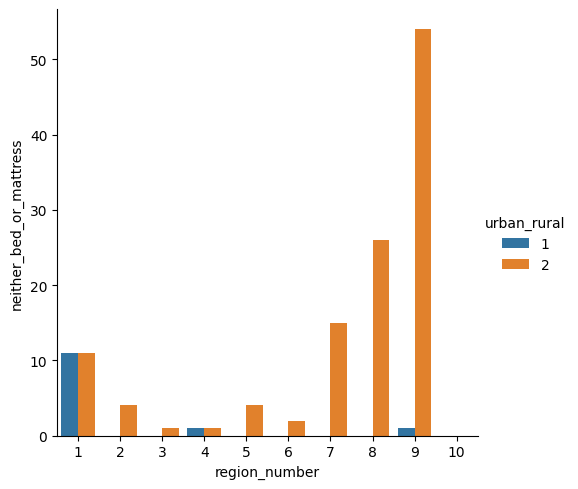

In [ ]:
sns.catplot(
    data=t,
    # height=20,
    x="region_number",
    y="neither_bed_or_mattress",
    hue="urban_rural",
    kind="bar",
)